# Import Required Libraries
Import the necessary libraries, including Pandas and Matplotlib.

In [1]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization

# Read CSV Files
Use the glob() function to get a list of all CSV files in the results folder. Then, use Pandas to read each CSV file into a separate dataframe.

In [2]:
import os

# Use glob() function to get a list of all CSV files in the results folder
import glob
csv_files = glob.glob('results/*.csv')

# Define a custom sorting function that extracts the numeric part of the filename
def sort_by_number(filename):
    # puts in int the number in the beginning of the filename
    # this is, until the first _
    return int(os.path.basename(filename).split('_')[0])

# Use Pandas to read each CSV file into a separate dataframe
dataframes = []
for file in sorted(csv_files, key=sort_by_number):
    df = pd.read_csv(file)
    title = os.path.basename(file).split('.')[0]
    df['title'] = title
    dataframes.append(df)

# Sort the list of dataframes by number
dataframes.sort(key=lambda dataframe: sort_by_number(dataframe['title'].iloc[0]))

In [3]:
# for each df print the first value
for df in dataframes:
    print(df['title'].iloc[0])

1_big_training
2_bigger_lrs
3_shorter_discriminator_lr
4_optimizer_rmsprop
5_optimizer_SGD
6_regularization_and_noise_big_training
7_balanced_models
8_training_big
9_training_bigger
10_back_to_medium_collapsing
11_bigger_fixed_training
12_still_big_regularization
13_linear


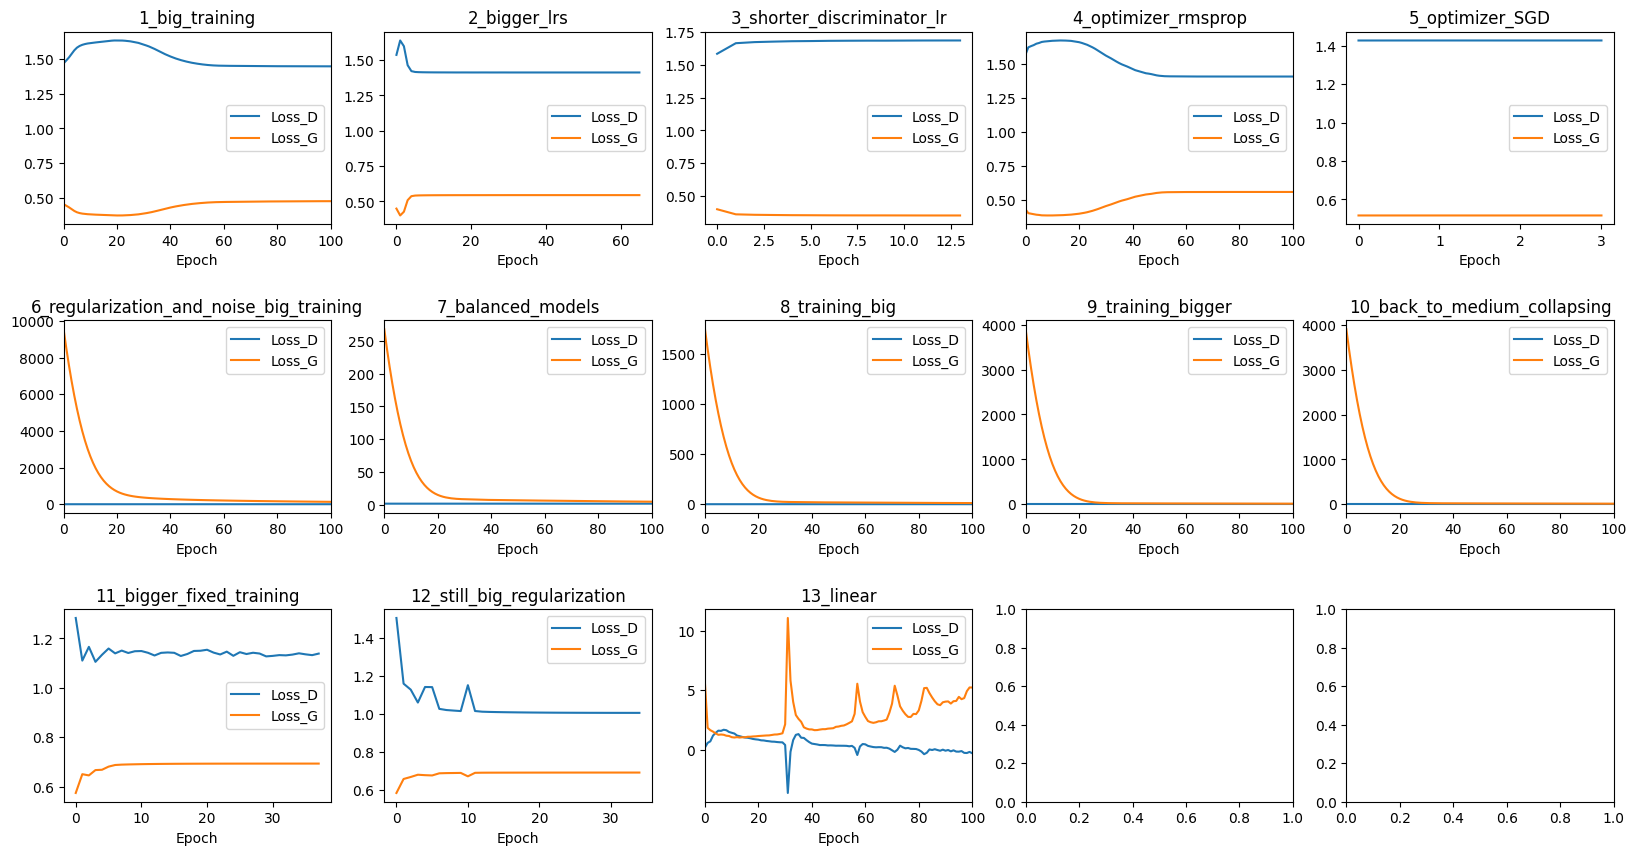

In [4]:
num_rows = 3
num_cols = -(-len(dataframes) // num_rows)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(dataframes):
            df = dataframes[index]
            df[['Loss_D', 'Loss_G']].plot(ax=axes[i, j])
            axes[i, j].set_title(df['title'].iloc[0])
            axes[i, j].set_xlabel('Epoch')
            if df['Epoch'].max() > 100:
                axes[i, j].set_xlim([0, 100])

In [5]:
# for each one of these plots, save it to a file
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(dataframes):
            df = dataframes[index]
            df[['Loss_D', 'Loss_G']].plot()
            plt.xlabel('Epoch')
            if df['Epoch'].max() > 100:
                plt.xlim([0, 100])
            plt.savefig('results/' + df['title'].iloc[0] + '.png')
            plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Combine Dataframes
Use Pandas to concatenate all dataframes into a single dataframe, adding a column for the iteration number.

In [6]:
# Use Pandas to concatenate all dataframes into a single dataframe, adding a column for the iteration number
combined_df = pd.concat(dataframes, ignore_index=True)
iteration_num = 0
for i in range(len(dataframes)):
    num_rows = len(dataframes[i])
    combined_df.loc[iteration_num:iteration_num+num_rows-1, 'iteration'] = i+1
    iteration_num += num_rows

# Print the combined dataframe
print(combined_df)

      Epoch    Loss_D    Loss_G           title  iteration
0         1  1.467472  0.456405  1_big_training        1.0
1         2  1.487947  0.445256  1_big_training        1.0
2         3  1.509591  0.433895  1_big_training        1.0
3         4  1.535580  0.420348  1_big_training        1.0
4         5  1.560809  0.407609  1_big_training        1.0
...     ...       ...       ...             ...        ...
3719    115 -0.547585  6.031951       13_linear       13.0
3720    116 -0.488444  6.438423       13_linear       13.0
3721    117 -0.576318  6.767822       13_linear       13.0
3722    118 -0.802018  6.821151       13_linear       13.0
3723    119 -0.562009  6.986802       13_linear       13.0

[3724 rows x 5 columns]


# Plot Losses
Use Matplotlib to create a scatter plot of Loss_D vs Loss_G for each iteration, with a different color for each iteration.

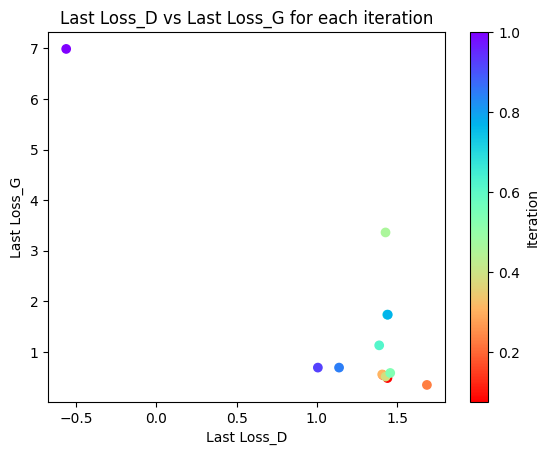

In [7]:
# Group the DataFrame by iteration and get the last loss values for each iteration
last_losses_df = combined_df.groupby('iteration').last()

# Use Matplotlib to create a scatter plot of the last Loss_D vs last Loss_G for each iteration, with a different color for each iteration
colors = last_losses_df.index/last_losses_df.index.max()
scatter = plt.scatter(last_losses_df['Loss_D'], last_losses_df['Loss_G'], c=colors, cmap='rainbow_r')
plt.xlabel('Last Loss_D')
plt.ylabel('Last Loss_G')
plt.title('Last Loss_D vs Last Loss_G for each iteration')
plt.colorbar(scatter, label='Iteration')
plt.show()

# Draw Conclusions
Analyze the plot to draw conclusions about the performance of the GAN model over time, such as whether the losses are converging or diverging, and whether the model is overfitting or underfitting.

             Loss_D     Loss_G
iteration                     
1.0        1.470380   0.464444
2.0        1.421476   0.538447
3.0        1.674627   0.356059
4.0        1.426821   0.545167
5.0        1.428977   0.516178
6.0        1.455438  99.102718
7.0        1.506824   8.536608
8.0        1.463172  28.792458
9.0        1.439468  71.241626
10.0       1.442306  88.905379
11.0       1.142693   0.685163
12.0       1.045138   0.686220
13.0       0.290055   3.287165


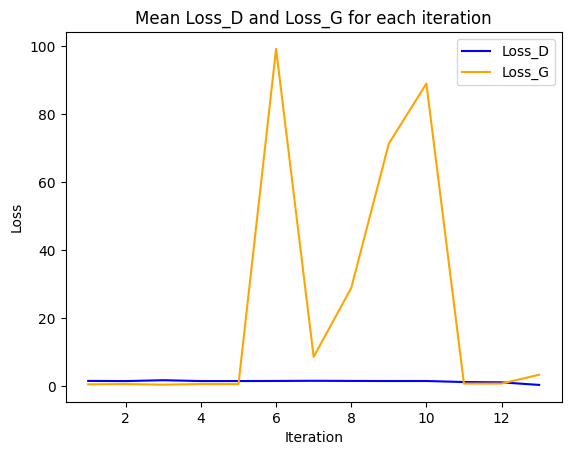

In [8]:
# Calculate the mean of Loss_D and Loss_G for each iteration
grouped_df = combined_df.groupby('iteration').agg({'Loss_D': 'mean', 'Loss_G': 'mean'})

# Print the grouped dataframe
print(grouped_df)

# Use Matplotlib to create a line plot of the mean Loss_D and Loss_G for each iteration
plt.plot(grouped_df.index, grouped_df['Loss_D'], color='blue', label='Loss_D')
plt.plot(grouped_df.index, grouped_df['Loss_G'], color='orange', label='Loss_G')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Mean Loss_D and Loss_G for each iteration')
plt.legend()
plt.show()